# Goal 

## The goal of the problem is to predict whether a passenger was delighted considering his/her overall travel experience of traveling in Shinkansen (Bullet Train). For each passenger id in the test set, you must predict the “Overall_Experience” level.

This is the problem of a Shinkansen (Bullet-Trains) of Japan. They aim to determine the relative importance of each parameter with regards to their contribution to the passenger travel experience. Provided is a random sample of individuals who travelled using their train. The on-time performance of the trains along with the passenger’s information is published in the CSV file named ‘Traveldata_train’.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report CSV labelled ‘Surveydata_train’.





In the survey, a passenger was explicitly asked whether they were delighted with their overall travel experience and that is captured in the data of the survey report under the variable labelled ‘Overall_Experience’. 

The objective of this exercise is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. You are provided test data containing Travel data and Survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same company.

In [1]:
## Import important Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
pip install --upgrade scikit-learn imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
## Import ML Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE


## Import Ensemble libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

## Import Support Vector Classifier library
from sklearn import svm
from sklearn.svm import SVC



## Import Metrics Libraries
from sklearn.metrics import classification_report, confusion_matrix,  roc_curve, roc_auc_score,accuracy_score

# Train Data

In [4]:
df_Surveydata_train = pd.read_csv(r"C:\Users\ANAY TIWARI\OneDrive\Desktop\Hackathon_GL\Surveydata_train_(1)_(1).csv")
df_Traveldata_train = pd.read_csv(r"C:\Users\ANAY TIWARI\OneDrive\Desktop\Hackathon_GL\Traveldata_train_(1)_(2).csv")

In [5]:
print('Shape of Surveydata_train : ',df_Surveydata_train.shape)
print('Shape of Traveldata_train : ',df_Traveldata_train.shape)

Shape of Surveydata_train :  (94379, 17)
Shape of Traveldata_train :  (94379, 9)


In [6]:
df_Surveydata_train

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,0,poor,Ordinary,good,good,Convinient,poor,poor,poor,poor,good,good,good,need improvement,good,poor
94375,98894376,1,good,Ordinary,good,good,Convinient,need improvement,excellent,excellent,acceptable,acceptable,acceptable,acceptable,good,acceptable,good
94376,98894377,1,need improvement,Green Car,need improvement,need improvement,need improvement,good,excellent,good,good,good,good,good,acceptable,good,acceptable
94377,98894378,0,need improvement,Ordinary,NaN,need improvement,Convinient,good,need improvement,good,good,acceptable,good,good,good,excellent,good


In [7]:
df_Traveldata_train

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0
...,...,...,...,...,...,...,...,...,...
94374,98894375,Male,Loyal Customer,32.0,Business travel,Business,1357,83.0,125.0
94375,98894376,Male,Loyal Customer,44.0,Business travel,Business,592,5.0,11.0
94376,98894377,Male,NaN,63.0,Business travel,Business,2794,0.0,0.0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0


In [8]:
## Merge Surveydata_train and Traveldata_train for Train and Test Set
df_train = pd.merge(df_Surveydata_train,df_Traveldata_train,on='ID',how='outer')

In [9]:
df_train

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,...,need improvement,poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,...,good,good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,...,excellent,excellent,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,...,acceptable,acceptable,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,...,good,good,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,0,poor,Ordinary,good,good,Convinient,poor,poor,poor,...,good,poor,Male,Loyal Customer,32.0,Business travel,Business,1357,83.0,125.0
94375,98894376,1,good,Ordinary,good,good,Convinient,need improvement,excellent,excellent,...,acceptable,good,Male,Loyal Customer,44.0,Business travel,Business,592,5.0,11.0
94376,98894377,1,need improvement,Green Car,need improvement,need improvement,need improvement,good,excellent,good,...,good,acceptable,Male,NaN,63.0,Business travel,Business,2794,0.0,0.0
94377,98894378,0,need improvement,Ordinary,NaN,need improvement,Convinient,good,need improvement,good,...,excellent,good,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0


In [10]:
print('The shape of the df_train :',df_train.shape)

The shape of the df_train : (94379, 25)


In [11]:
## Information of the df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_time_convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_location        94349 non-null  object 
 7   Onboardwifi_service      94349 non-null  object 
 8   Onboard_entertainment    94361 non-null  object 
 9   Online_support           94288 non-null  object 
 10  Onlinebooking_Ease       94306 non-null  object 
 11  Onboard_service          86778 non-null  object 
 12  Leg_room                 94289 non-null  object 
 13  Baggage_handling         94237 non-null  object 
 14  Checkin_service       

In [12]:
## Statistical Summary of the df_train
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
DepartureDelay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
ArrivalDelay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0


In [13]:
## Statistical Summary of the Categorical variables in df_train
df_train.describe(include='object').T

,count,unique,top,freq
Seat_comfort,94318,6,acceptable,21158
Seat_Class,94379,2,Green Car,47435
Arrival_time_convenient,85449,6,good,19574
Catering,85638,6,acceptable,18468
Platform_location,94349,6,manageable,24173
Onboardwifi_service,94349,6,good,22835
Onboard_entertainment,94361,6,good,30446
Online_support,94288,6,good,30016
Onlinebooking_Ease,94306,6,good,28909
Onboard_service,86778,6,good,27265


In [14]:
## Checking for Duplicate records 
df_train.duplicated().sum()

0

There are no duplicate records present in the df_train

In [15]:
## Split the data into categorical variables and Numerical variables
df_train_cat = df_train.select_dtypes(['object'])
df_train_num = df_train.select_dtypes(['int64','float64'])


In [16]:
print(df_train_cat.shape)
print(df_train_num.shape)

(94379, 19)
(94379, 6)


In [17]:
## Checking for the null values in categorical variables
df_train_cat.isnull().sum()

Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
Gender                       77
CustomerType               8951
TypeTravel                 9226
Travel_Class                  0
dtype: int64

In [18]:
## Checking for the null values in Numerical Variables
df_train_num.isnull().sum()

ID                          0
Overall_Experience          0
Age                        33
Travel_Distance             0
DepartureDelay_in_Mins     57
ArrivalDelay_in_Mins      357
dtype: int64

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
imputer= SimpleImputer(missing_values=np.nan,strategy = 'median')
imr = imputer.fit(df_train_num)
df_train_num = pd.DataFrame(imr.transform(df_train_num),columns=df_train_num.columns)

In [21]:
df_train_num.isnull().sum()

ID                        0
Overall_Experience        0
Age                       0
Travel_Distance           0
DepartureDelay_in_Mins    0
ArrivalDelay_in_Mins      0
dtype: int64

In [22]:
df_train_cat.isnull().sum()

Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
Gender                       77
CustomerType               8951
TypeTravel                 9226
Travel_Class                  0
dtype: int64

In [23]:
df_train_cat

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,TypeTravel,Travel_Class
0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor,Female,Loyal Customer,NaN,Business
1,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good,Male,Loyal Customer,Personal Travel,Eco
2,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent,Female,Loyal Customer,Business travel,Business
3,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable,Female,Loyal Customer,Business travel,Business
4,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good,Female,Loyal Customer,Business travel,Business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,poor,Ordinary,good,good,Convinient,poor,poor,poor,poor,good,good,good,need improvement,good,poor,Male,Loyal Customer,Business travel,Business
94375,good,Ordinary,good,good,Convinient,need improvement,excellent,excellent,acceptable,acceptable,acceptable,acceptable,good,acceptable,good,Male,Loyal Customer,Business travel,Business
94376,need improvement,Green Car,need improvement,need improvement,need improvement,good,excellent,good,good,good,good,good,acceptable,good,acceptable,Male,NaN,Business travel,Business
94377,need improvement,Ordinary,NaN,need improvement,Convinient,good,need improvement,good,good,acceptable,good,good,good,excellent,good,Male,Loyal Customer,Personal Travel,Eco


In [24]:
df_train_cat.mode()

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,TypeTravel,Travel_Class
0,acceptable,Green Car,good,acceptable,manageable,good,good,good,good,good,good,good,good,good,good,Female,Loyal Customer,Business travel,Eco


In [25]:
df_train_cat = df_train_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [26]:
df_train_cat.isnull().sum()

Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
TypeTravel                 0
Travel_Class               0
dtype: int64

In [27]:
df_train_cat

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,TypeTravel,Travel_Class
0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor,Female,Loyal Customer,Business travel,Business
1,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good,Male,Loyal Customer,Personal Travel,Eco
2,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent,Female,Loyal Customer,Business travel,Business
3,acceptable,Ordinary,need improvement,acceptable,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable,Female,Loyal Customer,Business travel,Business
4,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good,Female,Loyal Customer,Business travel,Business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,poor,Ordinary,good,good,Convinient,poor,poor,poor,poor,good,good,good,need improvement,good,poor,Male,Loyal Customer,Business travel,Business
94375,good,Ordinary,good,good,Convinient,need improvement,excellent,excellent,acceptable,acceptable,acceptable,acceptable,good,acceptable,good,Male,Loyal Customer,Business travel,Business
94376,need improvement,Green Car,need improvement,need improvement,need improvement,good,excellent,good,good,good,good,good,acceptable,good,acceptable,Male,Loyal Customer,Business travel,Business
94377,need improvement,Ordinary,good,need improvement,Convinient,good,need improvement,good,good,acceptable,good,good,good,excellent,good,Male,Loyal Customer,Personal Travel,Eco


In [28]:
df_train_num

,ID,Overall_Experience,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001.0,0.0,52.0,272.0,0.0,5.0
1,98800002.0,0.0,48.0,2200.0,9.0,0.0
2,98800003.0,1.0,43.0,1061.0,77.0,119.0
3,98800004.0,0.0,44.0,780.0,13.0,18.0
4,98800005.0,1.0,50.0,1981.0,0.0,0.0
...,...,...,...,...,...,...
94374,98894375.0,0.0,32.0,1357.0,83.0,125.0
94375,98894376.0,1.0,44.0,592.0,5.0,11.0
94376,98894377.0,1.0,63.0,2794.0,0.0,0.0
94377,98894378.0,0.0,16.0,2744.0,0.0,0.0


In [29]:
## Now we will scale the data using zscore
from scipy.stats import zscore

In [30]:
df_train_num_scaled = df_train_num[['Age','Travel_Distance','DepartureDelay_in_Mins','ArrivalDelay_in_Mins']].apply(zscore)

In [31]:
df_train_num_scaled

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,0.832356,-1.660469,-0.383916,-0.259227
1,0.567699,0.215099,-0.147874,-0.389511
2,0.236878,-0.892926,1.635557,2.711265
3,0.303042,-1.166284,-0.042966,0.079514
4,0.700027,0.002054,-0.383916,-0.389511
...,...,...,...,...
94374,-0.490928,-0.604976,1.792918,2.867606
94375,0.303042,-1.349171,-0.252782,-0.102885
94376,1.560162,0.792945,-0.383916,-0.389511
94377,-1.549556,0.744304,-0.383916,-0.389511


In [32]:
df_train = pd.concat([df_train_num['Overall_Experience'],df_train_num_scaled,df_train_cat],axis=1,join = 'inner')

In [33]:
df_train

,Overall_Experience,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,...,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,TypeTravel,Travel_Class
0,0.0,0.832356,-1.660469,-0.383916,-0.259227,need improvement,Green Car,excellent,excellent,very convinient,...,need improvement,acceptable,need improvement,good,need improvement,poor,Female,Loyal Customer,Business travel,Business
1,0.0,0.567699,0.215099,-0.147874,-0.389511,poor,Ordinary,excellent,poor,need improvement,...,excellent,need improvement,poor,need improvement,good,good,Male,Loyal Customer,Personal Travel,Eco
2,1.0,0.236878,-0.892926,1.635557,2.711265,need improvement,Green Car,need improvement,need improvement,need improvement,...,excellent,excellent,excellent,good,excellent,excellent,Female,Loyal Customer,Business travel,Business
3,0.0,0.303042,-1.166284,-0.042966,0.079514,acceptable,Ordinary,need improvement,acceptable,need improvement,...,acceptable,acceptable,acceptable,good,acceptable,acceptable,Female,Loyal Customer,Business travel,Business
4,1.0,0.700027,0.002054,-0.383916,-0.389511,acceptable,Ordinary,acceptable,acceptable,manageable,...,good,good,good,good,good,good,Female,Loyal Customer,Business travel,Business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,0.0,-0.490928,-0.604976,1.792918,2.867606,poor,Ordinary,good,good,Convinient,...,good,good,good,need improvement,good,poor,Male,Loyal Customer,Business travel,Business
94375,1.0,0.303042,-1.349171,-0.252782,-0.102885,good,Ordinary,good,good,Convinient,...,acceptable,acceptable,acceptable,good,acceptable,good,Male,Loyal Customer,Business travel,Business
94376,1.0,1.560162,0.792945,-0.383916,-0.389511,need improvement,Green Car,need improvement,need improvement,need improvement,...,good,good,good,acceptable,good,acceptable,Male,Loyal Customer,Business travel,Business
94377,0.0,-1.549556,0.744304,-0.383916,-0.389511,need improvement,Ordinary,good,need improvement,Convinient,...,acceptable,good,good,good,excellent,good,Male,Loyal Customer,Personal Travel,Eco


In [34]:
df_train.shape

(94379, 24)

In [35]:
df_train['Overall_Experience'] = df_train['Overall_Experience'].astype('int64')

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       94379 non-null  int64  
 1   Age                      94379 non-null  float64
 2   Travel_Distance          94379 non-null  float64
 3   DepartureDelay_in_Mins   94379 non-null  float64
 4   ArrivalDelay_in_Mins     94379 non-null  float64
 5   Seat_comfort             94379 non-null  object 
 6   Seat_Class               94379 non-null  object 
 7   Arrival_time_convenient  94379 non-null  object 
 8   Catering                 94379 non-null  object 
 9   Platform_location        94379 non-null  object 
 10  Onboardwifi_service      94379 non-null  object 
 11  Onboard_entertainment    94379 non-null  object 
 12  Online_support           94379 non-null  object 
 13  Onlinebooking_Ease       94379 non-null  object 
 14  Onboard_service       

In [37]:
for fields in df_train.columns:
    if df_train[fields].dtypes == 'object':
        print(fields)
        print(df_train[fields].value_counts(),'\n')
    

Seat_comfort
acceptable          21219
need improvement    20946
good                20595
poor                15185
excellent           12971
extremely poor       3463
Name: Seat_comfort, dtype: int64 

Seat_Class
Green Car    47435
Ordinary     46944
Name: Seat_Class, dtype: int64 

Arrival_time_convenient
good                28504
excellent           17684
acceptable          15177
need improvement    14990
poor                13692
extremely poor       4332
Name: Arrival_time_convenient, dtype: int64 

Catering
acceptable          27209
need improvement    17978
good                17969
poor                13858
excellent           13455
extremely poor       3910
Name: Catering, dtype: int64 

Platform_location
manageable           24203
Convinient           21912
need improvement     17832
Inconvinient         16449
very convinient      13981
very inconvinient        2
Name: Platform_location, dtype: int64 

Onboardwifi_service
good                22865
excellent           20968


In [38]:
df_train.columns

Index(['Overall_Experience', 'Age', 'Travel_Distance',
       'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins', 'Seat_comfort',
       'Seat_Class', 'Arrival_time_convenient', 'Catering',
       'Platform_location', 'Onboardwifi_service', 'Onboard_entertainment',
       'Online_support', 'Onlinebooking_Ease', 'Onboard_service', 'Leg_room',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Gender', 'CustomerType', 'TypeTravel', 'Travel_Class'],
      dtype='object')

In [39]:
df_train['Seat_comfort'] = np.where(df_train['Seat_comfort'] == 'extremely poor','0',df_train['Seat_comfort'] )
df_train['Seat_comfort'] = np.where(df_train['Seat_comfort'] == 'poor','1',df_train['Seat_comfort'] )
df_train['Seat_comfort'] = np.where(df_train['Seat_comfort'] == 'need improvement','2',df_train['Seat_comfort'] )
df_train['Seat_comfort'] = np.where(df_train['Seat_comfort'] == 'acceptable','3',df_train['Seat_comfort'] )
df_train['Seat_comfort'] = np.where(df_train['Seat_comfort'] == 'good','4',df_train['Seat_comfort'] )
df_train['Seat_comfort'] = np.where(df_train['Seat_comfort'] == 'excellent','5',df_train['Seat_comfort'] )

In [40]:
df_train['Arrival_time_convenient'] = np.where(df_train['Arrival_time_convenient'] == 'extremely poor', '0',df_train['Arrival_time_convenient'])
df_train['Arrival_time_convenient'] = np.where(df_train['Arrival_time_convenient'] == 'poor', '1',df_train['Arrival_time_convenient'])
df_train['Arrival_time_convenient'] = np.where(df_train['Arrival_time_convenient'] == 'need improvement', '2',df_train['Arrival_time_convenient'])
df_train['Arrival_time_convenient'] = np.where(df_train['Arrival_time_convenient'] == 'acceptable', '3',df_train['Arrival_time_convenient'])
df_train['Arrival_time_convenient'] = np.where(df_train['Arrival_time_convenient'] == 'good', '4',df_train['Arrival_time_convenient'])
df_train['Arrival_time_convenient'] = np.where(df_train['Arrival_time_convenient'] == 'excellent', '5',df_train['Arrival_time_convenient'])

In [41]:
df_train['Platform_location'] = np.where(df_train['Platform_location'] == 'very inconvinient', '0',df_train['Platform_location'])
df_train['Platform_location'] = np.where(df_train['Platform_location'] == 'Inconvinient', '1',df_train['Platform_location'])
df_train['Platform_location'] = np.where(df_train['Platform_location'] == 'need improvement', '2',df_train['Platform_location'])
df_train['Platform_location'] = np.where(df_train['Platform_location'] == 'manageable', '3',df_train['Platform_location'])
df_train['Platform_location'] = np.where(df_train['Platform_location'] == 'Convinient', '4',df_train['Platform_location'])
df_train['Platform_location'] = np.where(df_train['Platform_location'] == 'very convinient', '5',df_train['Platform_location'])

In [42]:
df_train['Seat_Class'] = np.where(df_train['Seat_Class'] == 'Ordinary', '0',df_train['Seat_Class'])
df_train['Seat_Class'] = np.where(df_train['Seat_Class'] == 'Green Car', '1',df_train['Seat_Class'])

In [43]:
df_train['Catering'] = np.where(df_train['Catering'] == 'extremely poor', '0',df_train['Catering'])
df_train['Catering'] = np.where(df_train['Catering'] == 'poor', '1',df_train['Catering'])
df_train['Catering'] = np.where(df_train['Catering'] == 'need improvement', '2',df_train['Catering'])
df_train['Catering'] = np.where(df_train['Catering'] == 'acceptable', '3',df_train['Catering'])
df_train['Catering'] = np.where(df_train['Catering'] == 'good', '4',df_train['Catering'])
df_train['Catering'] = np.where(df_train['Catering'] == 'excellent', '5',df_train['Catering'])

In [44]:
df_train['Onboardwifi_service'] = np.where(df_train['Onboardwifi_service'] == 'extremely poor', '0',df_train['Onboardwifi_service'])
df_train['Onboardwifi_service'] = np.where(df_train['Onboardwifi_service'] == 'poor', '1',df_train['Onboardwifi_service'])
df_train['Onboardwifi_service'] = np.where(df_train['Onboardwifi_service'] == 'need improvement', '2',df_train['Onboardwifi_service'])
df_train['Onboardwifi_service'] = np.where(df_train['Onboardwifi_service'] == 'acceptable', '3',df_train['Onboardwifi_service'])
df_train['Onboardwifi_service'] = np.where(df_train['Onboardwifi_service'] == 'good', '4',df_train['Onboardwifi_service'])
df_train['Onboardwifi_service'] = np.where(df_train['Onboardwifi_service'] == 'excellent', '5',df_train['Onboardwifi_service'])

In [45]:
df_train['Online_support'] = np.where(df_train['Online_support'] == 'extremely poor', '0',df_train['Online_support'])
df_train['Online_support'] = np.where(df_train['Online_support'] == 'poor', '1',df_train['Online_support'])
df_train['Online_support'] = np.where(df_train['Online_support'] == 'need improvement', '2',df_train['Online_support'])
df_train['Online_support'] = np.where(df_train['Online_support'] == 'acceptable', '3',df_train['Online_support'])
df_train['Online_support'] = np.where(df_train['Online_support'] == 'good', '4',df_train['Online_support'])
df_train['Online_support'] = np.where(df_train['Online_support'] == 'excellent', '5',df_train['Online_support'])

In [46]:
df_train['Onboard_entertainment'] = np.where(df_train['Onboard_entertainment'] == 'extremely poor', '0',df_train['Onboard_entertainment'])
df_train['Onboard_entertainment'] = np.where(df_train['Onboard_entertainment'] == 'poor', '1',df_train['Onboard_entertainment'])
df_train['Onboard_entertainment'] = np.where(df_train['Onboard_entertainment'] == 'need improvement', '2',df_train['Onboard_entertainment'])
df_train['Onboard_entertainment'] = np.where(df_train['Onboard_entertainment'] == 'acceptable', '3',df_train['Onboard_entertainment'])
df_train['Onboard_entertainment'] = np.where(df_train['Onboard_entertainment'] == 'good', '4',df_train['Onboard_entertainment'])
df_train['Onboard_entertainment'] = np.where(df_train['Onboard_entertainment'] == 'excellent', '5',df_train['Onboard_entertainment'])

In [47]:
df_train['Onboard_service'] = np.where(df_train['Onboard_service'] == 'extremely poor', '0',df_train['Onboard_service'])
df_train['Onboard_service'] = np.where(df_train['Onboard_service'] == 'poor', '1',df_train['Onboard_service'])
df_train['Onboard_service'] = np.where(df_train['Onboard_service'] == 'need improvement', '2',df_train['Onboard_service'])
df_train['Onboard_service'] = np.where(df_train['Onboard_service'] == 'acceptable', '3',df_train['Onboard_service'])
df_train['Onboard_service'] = np.where(df_train['Onboard_service'] == 'good', '4',df_train['Onboard_service'])
df_train['Onboard_service'] = np.where(df_train['Onboard_service'] == 'excellent', '5',df_train['Onboard_service'])

In [48]:
df_train['Leg_room'] = np.where(df_train['Leg_room'] == 'extremely poor', '0',df_train['Leg_room'])
df_train['Leg_room'] = np.where(df_train['Leg_room'] == 'poor', '1',df_train['Leg_room'])
df_train['Leg_room'] = np.where(df_train['Leg_room'] == 'need improvement', '2',df_train['Leg_room'])
df_train['Leg_room'] = np.where(df_train['Leg_room'] == 'acceptable', '3',df_train['Leg_room'])
df_train['Leg_room'] = np.where(df_train['Leg_room'] == 'good', '4',df_train['Leg_room'])
df_train['Leg_room'] = np.where(df_train['Leg_room'] == 'excellent', '5',df_train['Leg_room'])

In [49]:
df_train['Checkin_service'] = np.where(df_train['Checkin_service'] == 'extremely poor', '0',df_train['Checkin_service'])
df_train['Checkin_service'] = np.where(df_train['Checkin_service'] == 'poor', '1',df_train['Checkin_service'])
df_train['Checkin_service'] = np.where(df_train['Checkin_service'] == 'need improvement', '2',df_train['Checkin_service'])
df_train['Checkin_service'] = np.where(df_train['Checkin_service'] == 'acceptable', '3',df_train['Checkin_service'])
df_train['Checkin_service'] = np.where(df_train['Checkin_service'] == 'good', '4',df_train['Checkin_service'])
df_train['Checkin_service'] = np.where(df_train['Checkin_service'] == 'excellent', '5',df_train['Checkin_service'])

In [50]:
df_train['Online_boarding'] = np.where(df_train['Online_boarding'] == 'extremely poor', '0',df_train['Online_boarding'])
df_train['Online_boarding'] = np.where(df_train['Online_boarding'] == 'poor', '1',df_train['Online_boarding'])
df_train['Online_boarding'] = np.where(df_train['Online_boarding'] == 'need improvement', '2',df_train['Online_boarding'])
df_train['Online_boarding'] = np.where(df_train['Online_boarding'] == 'acceptable', '3',df_train['Online_boarding'])
df_train['Online_boarding'] = np.where(df_train['Online_boarding'] == 'good', '4',df_train['Online_boarding'])
df_train['Online_boarding'] = np.where(df_train['Online_boarding'] == 'excellent', '5',df_train['Online_boarding'])

In [51]:
df_train['Travel_Class'] = np.where(df_train['Travel_Class'] == 'Eco', '0',df_train['Travel_Class'])
df_train['Travel_Class'] = np.where(df_train['Travel_Class'] == 'Business', '1',df_train['Travel_Class'])

In [52]:
df_train['TypeTravel'] = np.where(df_train['TypeTravel'] == 'Personal Travel', '0',df_train['TypeTravel'])
df_train['TypeTravel'] = np.where(df_train['TypeTravel'] == 'Business travel', '1',df_train['TypeTravel'])

In [53]:
df_train['CustomerType'] = np.where(df_train['CustomerType'] == 'disloyal Customer', '0',df_train['CustomerType'])
df_train['CustomerType'] = np.where(df_train['CustomerType'] == 'Loyal Customer', '1',df_train['CustomerType'])

In [54]:
df_train['Cleanliness'] = np.where(df_train['Cleanliness'] == 'extremely poor', '0',df_train['Cleanliness'])
df_train['Cleanliness'] = np.where(df_train['Cleanliness'] == 'poor', '1',df_train['Cleanliness'])
df_train['Cleanliness'] = np.where(df_train['Cleanliness'] == 'need improvement', '2',df_train['Cleanliness'])
df_train['Cleanliness'] = np.where(df_train['Cleanliness'] == 'acceptable', '3',df_train['Cleanliness'])
df_train['Cleanliness'] = np.where(df_train['Cleanliness'] == 'good', '4',df_train['Cleanliness'])
df_train['Cleanliness'] = np.where(df_train['Cleanliness'] == 'excellent', '5',df_train['Cleanliness'])

In [55]:
df_train['Baggage_handling'] = np.where(df_train['Baggage_handling'] == 'extremely poor', '0',df_train['Baggage_handling'])
df_train['Baggage_handling'] = np.where(df_train['Baggage_handling'] == 'poor', '1',df_train['Baggage_handling'])
df_train['Baggage_handling'] = np.where(df_train['Baggage_handling'] == 'need improvement', '2',df_train['Baggage_handling'])
df_train['Baggage_handling'] = np.where(df_train['Baggage_handling'] == 'acceptable', '3',df_train['Baggage_handling'])
df_train['Baggage_handling'] = np.where(df_train['Baggage_handling'] == 'good', '4',df_train['Baggage_handling'])
df_train['Baggage_handling'] = np.where(df_train['Baggage_handling'] == 'excellent', '5',df_train['Baggage_handling'])

In [56]:
df_train['Onlinebooking_Ease'] = np.where(df_train['Onlinebooking_Ease'] == 'extremely poor', '0',df_train['Onlinebooking_Ease'])
df_train['Onlinebooking_Ease'] = np.where(df_train['Onlinebooking_Ease'] == 'poor', '1',df_train['Onlinebooking_Ease'])
df_train['Onlinebooking_Ease'] = np.where(df_train['Onlinebooking_Ease'] == 'need improvement', '2',df_train['Onlinebooking_Ease'])
df_train['Onlinebooking_Ease'] = np.where(df_train['Onlinebooking_Ease'] == 'acceptable', '3',df_train['Onlinebooking_Ease'])
df_train['Onlinebooking_Ease'] = np.where(df_train['Onlinebooking_Ease'] == 'good', '4',df_train['Onlinebooking_Ease'])
df_train['Onlinebooking_Ease'] = np.where(df_train['Onlinebooking_Ease'] == 'excellent', '5',df_train['Onlinebooking_Ease'])

In [57]:
df_train['Gender'] = np.where(df_train['Gender'] == 'Female', '0',df_train['Gender'])
df_train['Gender'] = np.where(df_train['Gender'] == 'Male', '1',df_train['Gender'])

In [58]:
## Convert all the features data types into 'int64'
df_train['Seat_comfort'] = df_train['Seat_comfort'].astype('int64')
df_train['Seat_Class'] = df_train['Seat_Class'].astype('int64')
df_train['Arrival_time_convenient'] = df_train['Arrival_time_convenient'].astype('int64')
df_train['Catering'] = df_train['Catering'].astype('int64')
df_train['Platform_location'] = df_train['Platform_location'].astype('int64')
df_train['Onboardwifi_service'] = df_train['Onboardwifi_service'].astype('int64')
df_train['Onboard_entertainment'] = df_train['Onboard_entertainment'].astype('int64')
df_train['Online_support'] = df_train['Online_support'].astype('int64')
df_train['Onlinebooking_Ease'] = df_train['Onlinebooking_Ease'].astype('int64')
df_train['Onboard_service'] = df_train['Onboard_service'].astype('int64')
df_train['Leg_room'] = df_train['Leg_room'].astype('int64')
df_train['Baggage_handling'] = df_train['Baggage_handling'].astype('int64')
df_train['Checkin_service'] = df_train['Checkin_service'].astype('int64')
df_train['Cleanliness'] = df_train['Cleanliness'].astype('int64')
df_train['Online_boarding'] = df_train['Online_boarding'].astype('int64')
df_train['Gender'] = df_train['Gender'].astype('int64')
df_train['CustomerType'] = df_train['CustomerType'].astype('int64')
df_train['TypeTravel'] = df_train['TypeTravel'].astype('int64')
df_train['Travel_Class'] = df_train['Travel_Class'].astype('int64')

In [59]:
## Lets validate the shape again
df_train.shape

(94379, 24)

In [60]:
df_train

,Overall_Experience,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,...,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,TypeTravel,Travel_Class
0,0,0.832356,-1.660469,-0.383916,-0.259227,2,1,5,5,5,...,2,3,2,4,2,1,0,1,1,1
1,0,0.567699,0.215099,-0.147874,-0.389511,1,0,5,1,2,...,5,2,1,2,4,4,1,1,0,0
2,1,0.236878,-0.892926,1.635557,2.711265,2,1,2,2,2,...,5,5,5,4,5,5,0,1,1,1
3,0,0.303042,-1.166284,-0.042966,0.079514,3,0,2,3,2,...,3,3,3,4,3,3,0,1,1,1
4,1,0.700027,0.002054,-0.383916,-0.389511,3,0,3,3,3,...,4,4,4,4,4,4,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,0,-0.490928,-0.604976,1.792918,2.867606,1,0,4,4,4,...,4,4,4,2,4,1,1,1,1,1
94375,1,0.303042,-1.349171,-0.252782,-0.102885,4,0,4,4,4,...,3,3,3,4,3,4,1,1,1,1
94376,1,1.560162,0.792945,-0.383916,-0.389511,2,1,2,2,2,...,4,4,4,3,4,3,1,1,1,1
94377,0,-1.549556,0.744304,-0.383916,-0.389511,2,0,4,2,4,...,3,4,4,4,5,4,1,1,0,0


In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       94379 non-null  int64  
 1   Age                      94379 non-null  float64
 2   Travel_Distance          94379 non-null  float64
 3   DepartureDelay_in_Mins   94379 non-null  float64
 4   ArrivalDelay_in_Mins     94379 non-null  float64
 5   Seat_comfort             94379 non-null  int64  
 6   Seat_Class               94379 non-null  int64  
 7   Arrival_time_convenient  94379 non-null  int64  
 8   Catering                 94379 non-null  int64  
 9   Platform_location        94379 non-null  int64  
 10  Onboardwifi_service      94379 non-null  int64  
 11  Onboard_entertainment    94379 non-null  int64  
 12  Online_support           94379 non-null  int64  
 13  Onlinebooking_Ease       94379 non-null  int64  
 14  Onboard_service       

In [62]:
## Again Verify is there any null values or not
df_train.isnull().sum()

Overall_Experience         0
Age                        0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
TypeTravel                 0
Travel_Class               0
dtype: int64

In [63]:
## Check the Descriptive Statistics
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall_Experience,94379.0,5.466576e-01,0.497821,0.000000,0.000000,1.000000,1.000000,1.000000
Age,94379.0,1.471843e-16,1.000005,-2.145034,-0.821749,0.038385,0.766191,3.015774
Travel_Distance,94379.0,-4.042864e-17,1.000005,-1.876431,-0.603030,-0.054368,0.543907,4.836894
DepartureDelay_in_Mins,94379.0,1.234692e-17,1.000005,-0.383916,-0.383916,-0.383916,-0.069193,41.369345
ArrivalDelay_in_Mins,94379.0,-6.625177e-18,1.000005,-0.389511,-0.389511,-0.389511,-0.050771,40.884682
Seat_comfort,94379.0,2.839286e+00,1.392082,0.000000,2.000000,3.000000,4.000000,5.000000
Seat_Class,94379.0,5.026012e-01,0.499996,0.000000,0.000000,1.000000,1.000000,1.000000
Arrival_time_convenient,94379.0,3.090084e+00,1.481769,0.000000,2.000000,3.000000,4.000000,5.000000
Catering,94379.0,2.867078e+00,1.376110,0.000000,2.000000,3.000000,4.000000,5.000000
Platform_location,94379.0,2.990867e+00,1.308025,0.000000,2.000000,3.000000,4.000000,5.000000


# Test Dataset

In [64]:
## Read the test data which is provided
df_Surveydata_test = pd.read_csv(r"C:\Users\ANAY TIWARI\OneDrive\Desktop\Hackathon_GL\Surveydata_test_(1).csv")
df_Traveldata_test = pd.read_csv(r"C:\Users\ANAY TIWARI\OneDrive\Desktop\Hackathon_GL\Traveldata_test_(1).csv")

In [65]:
print('The shape of the df_Surveydata_test data : ',df_Surveydata_test.shape)
print('the shape of the df_Traveldata_test : ',df_Traveldata_test.shape)

The shape of the df_Surveydata_test data :  (35602, 16)
the shape of the df_Traveldata_test :  (35602, 9)


In [66]:
df_Surveydata_test

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,99935598,need improvement,Green Car,excellent,need improvement,manageable,acceptable,need improvement,acceptable,acceptable,good,excellent,good,acceptable,good,acceptable
35598,99935599,need improvement,Ordinary,need improvement,good,need improvement,acceptable,excellent,excellent,good,good,good,good,acceptable,good,good
35599,99935600,good,Green Car,extremely poor,good,need improvement,need improvement,good,poor,need improvement,poor,acceptable,poor,poor,excellent,need improvement
35600,99935601,excellent,Ordinary,excellent,excellent,Inconvinient,acceptable,excellent,good,excellent,excellent,excellent,excellent,acceptable,excellent,good


In [67]:
df_Traveldata_test

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,Female,NaN,36.0,Business travel,Business,532,0.0,0.0
1,99900002,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0
...,...,...,...,...,...,...,...,...,...
35597,99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0
35598,99935599,Female,Loyal Customer,53.0,Business travel,Business,1772,0.0,0.0
35599,99935600,Male,disloyal Customer,22.0,Business travel,Eco,1180,0.0,0.0
35600,99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0


In [68]:
## Merge the Survey test and Travel test data
df_test = pd.merge(df_Surveydata_test,df_Traveldata_test,on='ID',how='outer')

In [69]:
df_test.shape

(35602, 24)

In [70]:
df_test

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,...,excellent,poor,Female,NaN,36.0,Business travel,Business,532,0.0,0.0
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,...,excellent,acceptable,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,...,need improvement,excellent,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,...,excellent,poor,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,...,excellent,excellent,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,99935598,need improvement,Green Car,excellent,need improvement,manageable,acceptable,need improvement,acceptable,acceptable,...,good,acceptable,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0
35598,99935599,need improvement,Ordinary,need improvement,good,need improvement,acceptable,excellent,excellent,good,...,good,good,Female,Loyal Customer,53.0,Business travel,Business,1772,0.0,0.0
35599,99935600,good,Green Car,extremely poor,good,need improvement,need improvement,good,poor,need improvement,...,excellent,need improvement,Male,disloyal Customer,22.0,Business travel,Eco,1180,0.0,0.0
35600,99935601,excellent,Ordinary,excellent,excellent,Inconvinient,acceptable,excellent,good,excellent,...,excellent,good,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0


In [71]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_comfort             35580 non-null  object 
 2   Seat_Class               35602 non-null  object 
 3   Arrival_time_convenient  32277 non-null  object 
 4   Catering                 32245 non-null  object 
 5   Platform_location        35590 non-null  object 
 6   Onboardwifi_service      35590 non-null  object 
 7   Onboard_entertainment    35594 non-null  object 
 8   Online_support           35576 non-null  object 
 9   Onlinebooking_Ease       35584 non-null  object 
 10  Onboard_service          32730 non-null  object 
 11  Leg_room                 35577 non-null  object 
 12  Baggage_handling         35562 non-null  object 
 13  Checkin_service          35580 non-null  object 
 14  Cleanliness           

In [72]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,35602.0,9.991780e+07,10277.556478,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0
Age,35591.0,3.944700e+01,15.137554,7.0,27.00,40.0,51.00,85.0
Travel_Distance,35602.0,1.987152e+03,1024.308863,50.0,1360.00,1929.0,2559.00,6868.0
DepartureDelay_in_Mins,35573.0,1.488070e+01,37.895453,0.0,0.00,0.0,13.00,978.0
ArrivalDelay_in_Mins,35479.0,1.530880e+01,38.531293,0.0,0.00,0.0,13.00,970.0


In [73]:
df_test.describe(include='object').T

,count,unique,top,freq
Seat_comfort,35580,6,acceptable,8003
Seat_Class,35602,2,Ordinary,17860
Arrival_time_convenient,32277,6,good,7361
Catering,32245,6,acceptable,7133
Platform_location,35590,5,manageable,9364
Onboardwifi_service,35590,6,good,8743
Onboard_entertainment,35594,6,good,11436
Online_support,35576,5,good,11487
Onlinebooking_Ease,35584,6,good,11025
Onboard_service,32730,5,good,10222


In [74]:
## Checking the duplicate records
df_test.duplicated().sum()

0

There is no duplicate present

In [75]:
## Splitting the data into categorical variables and numerical variables
df_test_cat = df_test.select_dtypes(['object'])
df_test_num = df_test.select_dtypes(['int64','float64'])

In [76]:
df_test_num.isnull().sum()

ID                          0
Age                        11
Travel_Distance             0
DepartureDelay_in_Mins     29
ArrivalDelay_in_Mins      123
dtype: int64

In [77]:
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
imr = imputer.fit(df_test_num)
df_test_num = pd.DataFrame(imr.transform(df_test_num),columns=df_test_num.columns)

In [78]:
df_test_num.isnull().sum()

ID                        0
Age                       0
Travel_Distance           0
DepartureDelay_in_Mins    0
ArrivalDelay_in_Mins      0
dtype: int64

In [79]:
df_test_cat.isnull().sum()

Seat_comfort                 22
Seat_Class                    0
Arrival_time_convenient    3325
Catering                   3357
Platform_location            12
Onboardwifi_service          12
Onboard_entertainment         8
Online_support               26
Onlinebooking_Ease           18
Onboard_service            2872
Leg_room                     25
Baggage_handling             40
Checkin_service              22
Cleanliness                   2
Online_boarding               2
Gender                       30
CustomerType               3383
TypeTravel                 3448
Travel_Class                  0
dtype: int64

In [80]:
df_test_cat = df_test_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [81]:
df_test_cat.isnull().sum()

Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
TypeTravel                 0
Travel_Class               0
dtype: int64

In [82]:
df_test_num

,ID,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001.0,36.0,532.0,0.0,0.0
1,99900002.0,21.0,1425.0,9.0,28.0
2,99900003.0,60.0,2832.0,0.0,0.0
3,99900004.0,29.0,1352.0,0.0,0.0
4,99900005.0,18.0,1610.0,17.0,0.0
...,...,...,...,...,...
35597,99935598.0,8.0,1334.0,0.0,0.0
35598,99935599.0,53.0,1772.0,0.0,0.0
35599,99935600.0,22.0,1180.0,0.0,0.0
35600,99935601.0,67.0,420.0,23.0,16.0


In [83]:
df_test_cat

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,TypeTravel,Travel_Class
0,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor,Female,Loyal Customer,Business travel,Business
1,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable,Female,disloyal Customer,Business travel,Business
2,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent,Male,Loyal Customer,Business travel,Business
3,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor,Female,Loyal Customer,Personal Travel,Eco
4,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,good,acceptable,excellent,excellent,excellent,excellent,Male,disloyal Customer,Business travel,Business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,need improvement,Green Car,excellent,need improvement,manageable,acceptable,need improvement,acceptable,acceptable,good,excellent,good,acceptable,good,acceptable,Male,Loyal Customer,Personal Travel,Eco
35598,need improvement,Ordinary,need improvement,good,need improvement,acceptable,excellent,excellent,good,good,good,good,acceptable,good,good,Female,Loyal Customer,Business travel,Business
35599,good,Green Car,extremely poor,good,need improvement,need improvement,good,poor,need improvement,poor,acceptable,poor,poor,excellent,need improvement,Male,disloyal Customer,Business travel,Eco
35600,excellent,Ordinary,excellent,excellent,Inconvinient,acceptable,excellent,good,excellent,excellent,excellent,excellent,acceptable,excellent,good,Female,Loyal Customer,Personal Travel,Eco


In [84]:
df_test_num_scaled = df_test_num[['Age','Travel_Distance','DepartureDelay_in_Mins','ArrivalDelay_in_Mins']].apply(zscore)

In [85]:
df_test_num_scaled

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,-0.227761,-1.420638,-0.392499,-0.396519
1,-1.218841,-0.548819,-0.154918,0.331234
2,1.357967,0.824810,-0.392499,-0.396519
3,-0.690265,-0.620087,-0.392499,-0.396519
4,-1.417057,-0.368206,0.056265,-0.396519
...,...,...,...,...
35597,-2.077777,-0.637660,-0.392499,-0.396519
35598,0.895463,-0.210049,-0.392499,-0.396519
35599,-1.152769,-0.788008,-0.392499,-0.396519
35600,1.820471,-1.529982,0.214652,0.019340


In [86]:
df_test = pd.concat([df_test_num_scaled,df_test_cat],axis=1,join='inner')
df_test

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,...,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,TypeTravel,Travel_Class
0,-0.227761,-1.420638,-0.392499,-0.396519,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,...,excellent,excellent,excellent,good,excellent,poor,Female,Loyal Customer,Business travel,Business
1,-1.218841,-0.548819,-0.154918,0.331234,extremely poor,Ordinary,good,poor,manageable,acceptable,...,excellent,acceptable,good,acceptable,excellent,acceptable,Female,disloyal Customer,Business travel,Business
2,1.357967,0.824810,-0.392499,-0.396519,excellent,Ordinary,excellent,excellent,very convinient,excellent,...,need improvement,need improvement,need improvement,good,need improvement,excellent,Male,Loyal Customer,Business travel,Business
3,-0.690265,-0.620087,-0.392499,-0.396519,acceptable,Green Car,excellent,acceptable,very convinient,poor,...,acceptable,need improvement,excellent,excellent,excellent,poor,Female,Loyal Customer,Personal Travel,Eco
4,-1.417057,-0.368206,0.056265,-0.396519,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,...,good,acceptable,excellent,excellent,excellent,excellent,Male,disloyal Customer,Business travel,Business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,-2.077777,-0.637660,-0.392499,-0.396519,need improvement,Green Car,excellent,need improvement,manageable,acceptable,...,good,excellent,good,acceptable,good,acceptable,Male,Loyal Customer,Personal Travel,Eco
35598,0.895463,-0.210049,-0.392499,-0.396519,need improvement,Ordinary,need improvement,good,need improvement,acceptable,...,good,good,good,acceptable,good,good,Female,Loyal Customer,Business travel,Business
35599,-1.152769,-0.788008,-0.392499,-0.396519,good,Green Car,extremely poor,good,need improvement,need improvement,...,poor,acceptable,poor,poor,excellent,need improvement,Male,disloyal Customer,Business travel,Eco
35600,1.820471,-1.529982,0.214652,0.019340,excellent,Ordinary,excellent,excellent,Inconvinient,acceptable,...,excellent,excellent,excellent,acceptable,excellent,good,Female,Loyal Customer,Personal Travel,Eco


In [87]:
for fields in df_test.columns:
    if df_test[fields].dtype == 'object':
        print(fields)
        print(df_test[fields].value_counts(),'\n')

Seat_comfort
acceptable          8025
need improvement    7831
good                7808
poor                5755
excellent           4854
extremely poor      1329
Name: Seat_comfort, dtype: int64 

Seat_Class
Ordinary     17860
Green Car    17742
Name: Seat_Class, dtype: int64 

Arrival_time_convenient
good                10686
excellent            6589
acceptable           5844
need improvement     5684
poor                 5131
extremely poor       1668
Name: Arrival_time_convenient, dtype: int64 

Catering
acceptable          10490
need improvement     6701
good                 6701
poor                 5178
excellent            5025
extremely poor       1507
Name: Catering, dtype: int64 

Platform_location
manageable          9376
Convinient          8178
need improvement    6703
Inconvinient        6134
very convinient     5211
Name: Platform_location, dtype: int64 

Onboardwifi_service
good                8755
excellent           7875
acceptable          7495
need improvement    

In [88]:
df_test.columns

Index(['Age', 'Travel_Distance', 'DepartureDelay_in_Mins',
       'ArrivalDelay_in_Mins', 'Seat_comfort', 'Seat_Class',
       'Arrival_time_convenient', 'Catering', 'Platform_location',
       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
       'CustomerType', 'TypeTravel', 'Travel_Class'],
      dtype='object')

In [89]:
df_test['Seat_comfort'] = np.where(df_test['Seat_comfort'] == 'extremely poor', '0',df_test['Seat_comfort'])
df_test['Seat_comfort'] = np.where(df_test['Seat_comfort'] == 'poor', '1',df_test['Seat_comfort'])
df_test['Seat_comfort'] = np.where(df_test['Seat_comfort'] == 'need improvement', '2',df_test['Seat_comfort'])
df_test['Seat_comfort'] = np.where(df_test['Seat_comfort'] == 'acceptable', '3',df_test['Seat_comfort'])
df_test['Seat_comfort'] = np.where(df_test['Seat_comfort'] == 'good', '4',df_test['Seat_comfort'])
df_test['Seat_comfort'] = np.where(df_test['Seat_comfort'] == 'excellent', '5',df_test['Seat_comfort'])

In [90]:
df_test['Catering'] = np.where(df_test['Catering'] == 'extremely poor', '0',df_test['Catering'])
df_test['Catering'] = np.where(df_test['Catering'] == 'poor', '1',df_test['Catering'])
df_test['Catering'] = np.where(df_test['Catering'] == 'need improvement', '2',df_test['Catering'])
df_test['Catering'] = np.where(df_test['Catering'] == 'acceptable', '3',df_test['Catering'])
df_test['Catering'] = np.where(df_test['Catering'] == 'good', '4',df_test['Catering'])
df_test['Catering'] = np.where(df_test['Catering'] == 'excellent', '5',df_test['Catering'])

In [91]:
df_test['Arrival_time_convenient'] = np.where(df_test['Arrival_time_convenient'] == 'extremely poor', '0',df_test['Arrival_time_convenient'])
df_test['Arrival_time_convenient'] = np.where(df_test['Arrival_time_convenient'] == 'poor', '1',df_test['Arrival_time_convenient'])
df_test['Arrival_time_convenient'] = np.where(df_test['Arrival_time_convenient'] == 'need improvement', '2',df_test['Arrival_time_convenient'])
df_test['Arrival_time_convenient'] = np.where(df_test['Arrival_time_convenient'] == 'acceptable', '3',df_test['Arrival_time_convenient'])
df_test['Arrival_time_convenient'] = np.where(df_test['Arrival_time_convenient'] == 'good', '4',df_test['Arrival_time_convenient'])
df_test['Arrival_time_convenient'] = np.where(df_test['Arrival_time_convenient'] == 'excellent', '5',df_test['Arrival_time_convenient'])

In [92]:
df_test['Platform_location'] = np.where(df_test['Platform_location'] == 'very inconvinient', '0',df_test['Platform_location'])
df_test['Platform_location'] = np.where(df_test['Platform_location'] == 'Inconvinient', '1',df_test['Platform_location'])
df_test['Platform_location'] = np.where(df_test['Platform_location'] == 'need improvement', '2',df_test['Platform_location'])
df_test['Platform_location'] = np.where(df_test['Platform_location'] == 'manageable', '3',df_test['Platform_location'])
df_test['Platform_location'] = np.where(df_test['Platform_location'] == 'Convinient', '4',df_test['Platform_location'])
df_test['Platform_location'] = np.where(df_test['Platform_location'] == 'very convinient', '5',df_test['Platform_location'])

In [93]:
df_test['Seat_Class'] = np.where(df_test['Seat_Class'] == 'Ordinary', '0',df_test['Seat_Class'])
df_test['Seat_Class'] = np.where(df_test['Seat_Class'] == 'Green Car', '1',df_test['Seat_Class'])

In [94]:
df_test['Onboard_entertainment'] = np.where(df_test['Onboard_entertainment'] == 'extremely poor', '0',df_test['Onboard_entertainment'])
df_test['Onboard_entertainment'] = np.where(df_test['Onboard_entertainment'] == 'poor', '1',df_test['Onboard_entertainment'])
df_test['Onboard_entertainment'] = np.where(df_test['Onboard_entertainment'] == 'need improvement', '2',df_test['Onboard_entertainment'])
df_test['Onboard_entertainment'] = np.where(df_test['Onboard_entertainment'] == 'acceptable', '3',df_test['Onboard_entertainment'])
df_test['Onboard_entertainment'] = np.where(df_test['Onboard_entertainment'] == 'good', '4',df_test['Onboard_entertainment'])
df_test['Onboard_entertainment'] = np.where(df_test['Onboard_entertainment'] == 'excellent', '5',df_test['Onboard_entertainment'])

In [95]:
df_test['Online_support'] = np.where(df_test['Online_support'] == 'extremely poor', '0',df_test['Online_support'])
df_test['Online_support'] = np.where(df_test['Online_support'] == 'poor', '1',df_test['Online_support'])
df_test['Online_support'] = np.where(df_test['Online_support'] == 'need improvement', '2',df_test['Online_support'])
df_test['Online_support'] = np.where(df_test['Online_support'] == 'acceptable', '3',df_test['Online_support'])
df_test['Online_support'] = np.where(df_test['Online_support'] == 'good', '4',df_test['Online_support'])
df_test['Online_support'] = np.where(df_test['Online_support'] == 'excellent', '5',df_test['Online_support'])

In [96]:
df_test['Onboardwifi_service'] = np.where(df_test['Onboardwifi_service'] == 'extremely poor', '0',df_test['Onboardwifi_service'])
df_test['Onboardwifi_service'] = np.where(df_test['Onboardwifi_service'] == 'poor', '1',df_test['Onboardwifi_service'])
df_test['Onboardwifi_service'] = np.where(df_test['Onboardwifi_service'] == 'need improvement', '2',df_test['Onboardwifi_service'])
df_test['Onboardwifi_service'] = np.where(df_test['Onboardwifi_service'] == 'acceptable', '3',df_test['Onboardwifi_service'])
df_test['Onboardwifi_service'] = np.where(df_test['Onboardwifi_service'] == 'good', '4',df_test['Onboardwifi_service'])
df_test['Onboardwifi_service'] = np.where(df_test['Onboardwifi_service'] == 'excellent', '5',df_test['Onboardwifi_service'])

In [97]:
df_test['Leg_room'] = np.where(df_test['Leg_room'] == 'extremely poor', '0',df_test['Leg_room'])
df_test['Leg_room'] = np.where(df_test['Leg_room'] == 'poor', '1',df_test['Leg_room'])
df_test['Leg_room'] = np.where(df_test['Leg_room'] == 'need improvement', '2',df_test['Leg_room'])
df_test['Leg_room'] = np.where(df_test['Leg_room'] == 'acceptable', '3',df_test['Leg_room'])
df_test['Leg_room'] = np.where(df_test['Leg_room'] == 'good', '4',df_test['Leg_room'])
df_test['Leg_room'] = np.where(df_test['Leg_room'] == 'excellent', '5',df_test['Leg_room'])

In [98]:
df_test['Onboard_service'] = np.where(df_test['Onboard_service'] == 'extremely poor', '0',df_test['Onboard_service'])
df_test['Onboard_service'] = np.where(df_test['Onboard_service'] == 'poor', '1',df_test['Onboard_service'])
df_test['Onboard_service'] = np.where(df_test['Onboard_service'] == 'need improvement', '2',df_test['Onboard_service'])
df_test['Onboard_service'] = np.where(df_test['Onboard_service'] == 'acceptable', '3',df_test['Onboard_service'])
df_test['Onboard_service'] = np.where(df_test['Onboard_service'] == 'good', '4',df_test['Onboard_service'])
df_test['Onboard_service'] = np.where(df_test['Onboard_service'] == 'excellent', '5',df_test['Onboard_service'])

In [99]:
df_test['Baggage_handling'] = np.where(df_test['Baggage_handling'] == 'extremely poor', '0',df_test['Baggage_handling'])
df_test['Baggage_handling'] = np.where(df_test['Baggage_handling'] == 'poor', '1',df_test['Baggage_handling'])
df_test['Baggage_handling'] = np.where(df_test['Baggage_handling'] == 'need improvement', '2',df_test['Baggage_handling'])
df_test['Baggage_handling'] = np.where(df_test['Baggage_handling'] == 'acceptable', '3',df_test['Baggage_handling'])
df_test['Baggage_handling'] = np.where(df_test['Baggage_handling'] == 'good', '4',df_test['Baggage_handling'])
df_test['Baggage_handling'] = np.where(df_test['Baggage_handling'] == 'excellent', '5',df_test['Baggage_handling'])

In [100]:
df_test['TypeTravel'] = np.where(df_test['TypeTravel'] == 'Personal Travel', '0',df_test['TypeTravel'])
df_test['TypeTravel'] = np.where(df_test['TypeTravel'] == 'Business travel', '1',df_test['TypeTravel'])

In [101]:
df_test['Cleanliness'] = np.where(df_test['Cleanliness'] == 'extremely poor', '0',df_test['Cleanliness'])
df_test['Cleanliness'] = np.where(df_test['Cleanliness'] == 'poor', '1',df_test['Cleanliness'])
df_test['Cleanliness'] = np.where(df_test['Cleanliness'] == 'need improvement', '2',df_test['Cleanliness'])
df_test['Cleanliness'] = np.where(df_test['Cleanliness'] == 'acceptable', '3',df_test['Cleanliness'])
df_test['Cleanliness'] = np.where(df_test['Cleanliness'] == 'good', '4',df_test['Cleanliness'])
df_test['Cleanliness'] = np.where(df_test['Cleanliness'] == 'excellent', '5',df_test['Cleanliness'])

In [102]:
df_test['CustomerType'] = np.where(df_test['CustomerType'] == 'disloyal Customer', '0',df_test['CustomerType'])
df_test['CustomerType'] = np.where(df_test['CustomerType'] == 'Loyal Customer', '1',df_test['CustomerType'])

In [103]:
df_test['Travel_Class'] = np.where(df_test['Travel_Class'] == 'Eco', '0',df_test['Travel_Class'])
df_test['Travel_Class'] = np.where(df_test['Travel_Class'] == 'Business', '1',df_test['Travel_Class'])

In [104]:
df_test['Online_boarding'] = np.where(df_test['Online_boarding'] == 'extremely poor', '0',df_test['Online_boarding'])
df_test['Online_boarding'] = np.where(df_test['Online_boarding'] == 'poor', '1',df_test['Online_boarding'])
df_test['Online_boarding'] = np.where(df_test['Online_boarding'] == 'need improvement', '2',df_test['Online_boarding'])
df_test['Online_boarding'] = np.where(df_test['Online_boarding'] == 'acceptable', '3',df_test['Online_boarding'])
df_test['Online_boarding'] = np.where(df_test['Online_boarding'] == 'good', '4',df_test['Online_boarding'])
df_test['Online_boarding'] = np.where(df_test['Online_boarding'] == 'excellent', '5',df_test['Online_boarding'])

In [105]:
df_test['Checkin_service'] = np.where(df_test['Checkin_service'] == 'extremely poor', '0',df_test['Checkin_service'])
df_test['Checkin_service'] = np.where(df_test['Checkin_service'] == 'poor', '1',df_test['Checkin_service'])
df_test['Checkin_service'] = np.where(df_test['Checkin_service'] == 'need improvement', '2',df_test['Checkin_service'])
df_test['Checkin_service'] = np.where(df_test['Checkin_service'] == 'acceptable', '3',df_test['Checkin_service'])
df_test['Checkin_service'] = np.where(df_test['Checkin_service'] == 'good', '4',df_test['Checkin_service'])
df_test['Checkin_service'] = np.where(df_test['Checkin_service'] == 'excellent', '5',df_test['Checkin_service'])

In [106]:
df_test['Onlinebooking_Ease'] = np.where(df_test['Onlinebooking_Ease'] == 'extremely poor', '0',df_test['Onlinebooking_Ease'])
df_test['Onlinebooking_Ease'] = np.where(df_test['Onlinebooking_Ease'] == 'poor', '1',df_test['Onlinebooking_Ease'])
df_test['Onlinebooking_Ease'] = np.where(df_test['Onlinebooking_Ease'] == 'need improvement', '2',df_test['Onlinebooking_Ease'])
df_test['Onlinebooking_Ease'] = np.where(df_test['Onlinebooking_Ease'] == 'acceptable', '3',df_test['Onlinebooking_Ease'])
df_test['Onlinebooking_Ease'] = np.where(df_test['Onlinebooking_Ease'] == 'good', '4',df_test['Onlinebooking_Ease'])
df_test['Onlinebooking_Ease'] = np.where(df_test['Onlinebooking_Ease'] == 'excellent', '5',df_test['Onlinebooking_Ease'])

In [107]:
df_test['Gender'] = np.where(df_test['Gender'] == 'Female', '0',df_test['Gender'])
df_test['Gender'] = np.where(df_test['Gender'] == 'Male', '1',df_test['Gender'])

In [108]:
## Converting the Data types into int64
df_test['Seat_comfort'] = df_test['Seat_comfort'].astype('int64')
df_test['Seat_Class'] = df_test['Seat_Class'].astype('int64')
df_test['Arrival_time_convenient'] = df_test['Arrival_time_convenient'].astype('int64')
df_test['Catering'] = df_test['Catering'].astype('int64')
df_test['Platform_location'] = df_test['Platform_location'].astype('int64')
df_test['Onboardwifi_service'] = df_test['Onboardwifi_service'].astype('int64')
df_test['Onboard_entertainment'] = df_test['Onboard_entertainment'].astype('int64')
df_test['Online_support'] = df_test['Online_support'].astype('int64')
df_test['Onlinebooking_Ease'] = df_test['Onlinebooking_Ease'].astype('int64')
df_test['Onboard_service'] = df_test['Onboard_service'].astype('int64')
df_test['Leg_room'] = df_test['Leg_room'].astype('int64')
df_test['Baggage_handling'] = df_test['Baggage_handling'].astype('int64')
df_test['Checkin_service'] = df_test['Checkin_service'].astype('int64')
df_test['Cleanliness'] = df_test['Cleanliness'].astype('int64')
df_test['Online_boarding'] = df_test['Online_boarding'].astype('int64')
df_test['Gender'] = df_test['Gender'].astype('int64')
df_test['CustomerType'] = df_test['CustomerType'].astype('int64')
df_test['TypeTravel'] = df_test['TypeTravel'].astype('int64')
df_test['Travel_Class'] = df_test['Travel_Class'].astype('int64')

In [109]:
df_test.shape

(35602, 23)

In [110]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,35602.0,1.594640e-16,1.000014,-2.143849,-0.822409,0.036527,0.763319,3.009767
Travel_Distance,35602.0,5.588224e-18,1.000014,-1.891206,-0.612277,-0.056773,0.558285,4.765083
DepartureDelay_in_Mins,35602.0,2.754196e-17,1.000014,-0.392499,-0.392499,-0.392499,-0.049326,25.424606
ArrivalDelay_in_Mins,35602.0,2.374995e-17,1.000014,-0.396519,-0.396519,-0.396519,-0.058634,24.814906
Seat_comfort,35602.0,2.836751e+00,1.393053,0.000000,2.000000,3.000000,4.000000,5.000000
Seat_Class,35602.0,4.983428e-01,0.500004,0.000000,0.000000,0.000000,1.000000,1.000000
Arrival_time_convenient,35602.0,3.081849e+00,1.480409,0.000000,2.000000,3.000000,4.000000,5.000000
Catering,35602.0,2.864418e+00,1.373103,0.000000,2.000000,3.000000,4.000000,5.000000
Platform_location,35602.0,2.989579e+00,1.300988,1.000000,2.000000,3.000000,4.000000,5.000000
Onboardwifi_service,35602.0,3.251840e+00,1.316920,0.000000,2.000000,3.000000,4.000000,5.000000


In [111]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      35602 non-null  float64
 1   Travel_Distance          35602 non-null  float64
 2   DepartureDelay_in_Mins   35602 non-null  float64
 3   ArrivalDelay_in_Mins     35602 non-null  float64
 4   Seat_comfort             35602 non-null  int64  
 5   Seat_Class               35602 non-null  int64  
 6   Arrival_time_convenient  35602 non-null  int64  
 7   Catering                 35602 non-null  int64  
 8   Platform_location        35602 non-null  int64  
 9   Onboardwifi_service      35602 non-null  int64  
 10  Onboard_entertainment    35602 non-null  int64  
 11  Online_support           35602 non-null  int64  
 12  Onlinebooking_Ease       35602 non-null  int64  
 13  Onboard_service          35602 non-null  int64  
 14  Leg_room              

# Proportion of Delighted customers

In [112]:
df_train['Overall_Experience'].value_counts(normalize = True)

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64

### As we can see 0 and 1 has the same proportion like 10% difference so we can say the data is not bias

# Correlation Plot

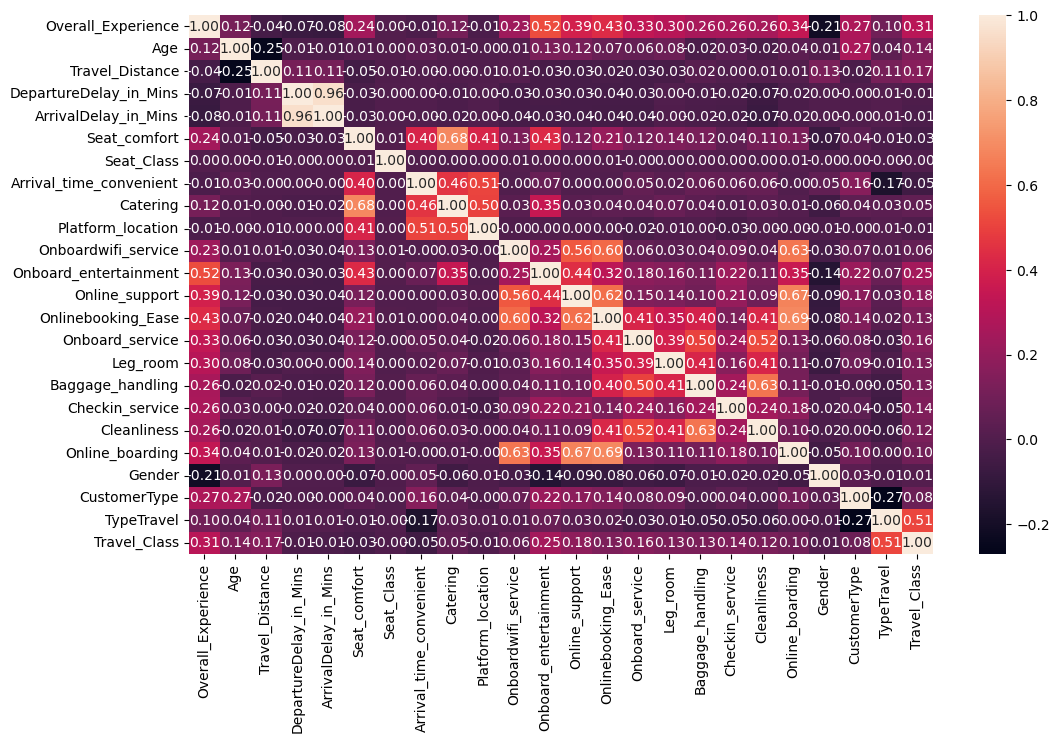

In [113]:
plt.figure(figsize=(12,7))
sns.heatmap(df_train.corr(), annot = True , fmt = '.2f');

In [114]:
# making copies of dataset
df_train_1 = df_train.copy()
df_train_2 = df_train.copy()

# Extracting the target column into separate vectors for training set and test set

In [115]:
X = df_train_1.drop('Overall_Experience',axis=1)
y=df_train_1['Overall_Experience']

In [116]:
## Splitting the data into Xtrain,ytrain,Xtest,ytest
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [117]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (66065, 23)
X_test (28314, 23)
y_train (66065,)
y_test (28314,)


# Model 1 Logistic Regression

In [118]:
lr = LogisticRegression()

In [119]:
lr.fit(X_train,y_train)

LogisticRegression()

In [120]:
ytrain_predict = lr.predict(X_train)
print('Accuracy Score of Training data of Logistic Regression : ',accuracy_score(y_train,ytrain_predict))

Accuracy Score of Training data of Logistic Regression :  0.8316355104821009


In [121]:
ytest_predict = lr.predict(X_test)
print('Accuracy Score of Test Data of Logistic Regression : ',accuracy_score(y_test,ytest_predict))

Accuracy Score of Test Data of Logistic Regression :  0.8320265592992866


In [122]:
ytest_predict.shape

(28314,)

In [123]:
X_test

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,...,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,TypeTravel,Travel_Class
45654,0.104549,-0.789809,-0.331462,-0.389511,3,0,3,3,3,3,...,5,5,5,3,5,4,0,1,1,1
5978,0.700027,-0.182779,-0.383916,-0.389511,2,1,2,2,2,2,...,4,4,4,5,4,3,1,1,1,1
18758,0.435370,1.720027,2.081415,2.059841,2,0,2,2,2,5,...,5,5,5,2,5,4,1,1,1,1
88394,0.369206,0.300705,3.104265,2.737322,5,0,5,5,5,5,...,5,3,4,5,1,5,0,1,1,0
1833,-0.887914,0.923300,2.527272,3.727485,1,1,4,1,4,1,...,4,4,5,5,4,5,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79493,0.435370,-1.184767,-0.383916,-0.337397,3,1,3,3,3,5,...,3,3,3,1,3,1,0,1,1,0
50206,-0.623257,-0.008646,-0.383916,0.235855,3,0,5,3,5,3,...,1,2,4,5,4,3,0,1,0,0
8322,-2.078869,-0.115655,-0.357689,-0.389511,4,1,4,4,4,1,...,3,3,4,5,4,1,1,1,0,0
2548,-0.821749,0.234555,-0.383916,-0.389511,2,1,2,2,1,2,...,4,1,1,1,2,2,1,0,1,1


In [124]:
y_test

45654    1
5978     1
18758    1
88394    1
1833     0
        ..
79493    0
50206    0
8322     0
2548     0
70937    1
Name: Overall_Experience, Length: 28314, dtype: int64

In [125]:
X_train

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,...,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,TypeTravel,Travel_Class
16280,-0.821749,1.004043,-0.383916,-0.259227,3,0,5,4,1,5,...,3,2,3,4,5,5,0,1,0,0
65782,-0.424764,0.410632,-0.383916,-0.389511,3,1,4,3,3,5,...,5,5,5,4,5,5,0,1,0,0
92958,0.170714,0.349346,-0.357689,-0.389511,4,1,4,4,4,5,...,4,4,4,3,4,4,0,1,1,1
15276,1.163177,-0.183751,-0.383916,-0.389511,3,0,3,3,3,3,...,4,4,4,5,4,4,0,1,1,1
64291,-0.755585,-0.254766,-0.383916,-0.389511,0,1,0,3,1,1,...,3,1,1,4,5,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,-0.027779,-0.436681,-0.383916,-0.389511,4,0,4,4,4,3,...,5,5,5,5,5,4,1,1,1,1
73349,1.097012,1.971984,-0.383916,-0.389511,3,1,3,3,3,4,...,4,5,4,4,4,5,1,1,1,1
50057,0.898520,-1.818063,-0.383916,-0.389511,5,1,5,5,5,2,...,4,5,5,1,5,4,0,1,1,0
5192,0.104549,0.084743,1.583103,1.512645,5,0,3,4,3,5,...,3,5,5,4,2,5,0,1,1,0


In [126]:
X_test

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,...,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,TypeTravel,Travel_Class
45654,0.104549,-0.789809,-0.331462,-0.389511,3,0,3,3,3,3,...,5,5,5,3,5,4,0,1,1,1
5978,0.700027,-0.182779,-0.383916,-0.389511,2,1,2,2,2,2,...,4,4,4,5,4,3,1,1,1,1
18758,0.435370,1.720027,2.081415,2.059841,2,0,2,2,2,5,...,5,5,5,2,5,4,1,1,1,1
88394,0.369206,0.300705,3.104265,2.737322,5,0,5,5,5,5,...,5,3,4,5,1,5,0,1,1,0
1833,-0.887914,0.923300,2.527272,3.727485,1,1,4,1,4,1,...,4,4,5,5,4,5,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79493,0.435370,-1.184767,-0.383916,-0.337397,3,1,3,3,3,5,...,3,3,3,1,3,1,0,1,1,0
50206,-0.623257,-0.008646,-0.383916,0.235855,3,0,5,3,5,3,...,1,2,4,5,4,3,0,1,0,0
8322,-2.078869,-0.115655,-0.357689,-0.389511,4,1,4,4,4,1,...,3,3,4,5,4,1,1,1,0,0
2548,-0.821749,0.234555,-0.383916,-0.389511,2,1,2,2,1,2,...,4,1,1,1,2,2,1,0,1,1


In [127]:
ytrain_predict.shape

(66065,)

In [128]:
ytest_predict.shape

(28314,)

In [129]:
df_Surveydata_train.shape

(94379, 17)

# Model 2 Random Forest Classifier

In [130]:
#rf = RandomForestClassifier(n_estimators=220, max_depth= 20, max_features= 15, random_state = 1)


In [131]:
#rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=15, n_estimators=220,
                       random_state=1)

In [132]:
#ytrain_predict_rf = rf.predict(X_train)
#display(accuracy_score(y_train, ytrain_predict_rf))
#ytest_predict_rf = rf.predict(X_test)
#display(accuracy_score(y_test, ytest_predict_rf))

0.996927268599107

0.9524969979515434

In [133]:
#ytrain_predict_rf.shape

(66065,)

In [134]:
#ytest_predict_rf.shape

(28314,)

In [135]:
#rf1 = RandomForestClassifier(n_estimators=300, max_depth= 20, max_features= 15, random_state = 1)

In [136]:
#rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=15, n_estimators=300,
                       random_state=1)

In [137]:
#ytrain_predict_rf1 = rf1.predict(X_train)
#display(accuracy_score(y_train, ytrain_predict_rf1))

0.9968818587754484

In [138]:
#ytest_predict_rf1 = rf1.predict(X_test)
#display(accuracy_score(y_test, ytest_predict_rf1))

0.9529914529914529

# Best Model

In [139]:
#df_test1 = df_test_num.copy()

In [140]:
#prediction = rf1.predict(df_test)

In [141]:
#df_test1['Overall_Experience'] = prediction

In [142]:
#sample1 = df_test1[['ID','Overall_Experience']]

In [143]:
#sample1 = df_test1[['ID', 'Overall_Experience']].copy()  
#sample1.reset_index(drop=True, inplace=True)  


In [144]:
#sample1

,ID,Overall_Experience
0,99900001.0,1
1,99900002.0,1
2,99900003.0,1
3,99900004.0,0
4,99900005.0,1
...,...,...
35597,99935598.0,0
35598,99935599.0,1
35599,99935600.0,1
35600,99935601.0,1


In [145]:
## sample1.to_csv(r"C:\Users\ANAY TIWARI\OneDrive\Desktop\Hackathon_GL\prediction_1.csv")

# Ada Boosting

In [203]:
#ada = AdaBoostClassifier(n_estimators=100,random_state=1)

In [204]:
#ada.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [205]:
#ytrain_predict_ada = ada.predict(X_train)
#display(accuracy_score(y_train,ytrain_predict_ada))

0.9008400817376826

In [206]:
#ytest_predict_ada = ada.predict(X_test)
#display(accuracy_score(y_test,ytest_predict_ada))

0.9002966730239458

# Bagging

In [199]:
#bag = BaggingClassifier(n_estimators=25,random_state=2)

In [200]:
#bag.fit(X_train,y_train)

BaggingClassifier(n_estimators=25, random_state=2)

In [201]:
#ytrain_predict_bag = bag.predict(X_train)
#display(accuracy_score(y_train,ytrain_predict_bag))

0.9992885794293499

In [202]:
#ytest_predict_bag = bag.predict(X_test)
#display(accuracy_score(y_test,ytest_predict_bag))

0.9483294483294483

In [181]:
df_test2 = df_test_num.copy()

In [207]:
prediction_ada = bag.predict(df_test)

In [183]:
df_test2['Overall_Experience'] = prediction_ada

In [208]:
sample_3 = df_test2[['ID','Overall_Experience']]

In [209]:
sample_2

,ID,Overall_Experience
0,99900001.0,1
1,99900002.0,1
2,99900003.0,1
3,99900004.0,0
4,99900005.0,1
...,...,...
35597,99935598.0,0
35598,99935599.0,1
35599,99935600.0,0
35600,99935601.0,1


In [210]:
sample_2.to_csv(r"C:\Users\ANAY TIWARI\OneDrive\Desktop\Hackathon_GL\prediction_3.csv")

# Gradient Boosting

In [211]:
grad = GradientBoostingClassifier(n_estimators=100,random_state=1)

In [212]:
grad.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [213]:
ytrain_predict_grad = grad.predict(X_train)
display(accuracy_score(y_train,ytrain_predict_grad))

0.9211382729130402

In [214]:
ytest_predict_grad = grad.predict(X_test)
display(accuracy_score(y_test,ytest_predict_grad))

0.9209225118316028

In [215]:
prediction_grad = grad.predict(df_test)

In [217]:
df_test2['Overall_Experience'] = prediction_grad

In [218]:
sample_4 = df_test2[['ID','Overall_Experience']]

In [219]:
sample_4

,ID,Overall_Experience
0,99900001.0,1
1,99900002.0,1
2,99900003.0,1
3,99900004.0,0
4,99900005.0,1
...,...,...
35597,99935598.0,0
35598,99935599.0,1
35599,99935600.0,0
35600,99935601.0,1


In [220]:
sample_4.to_csv(r"C:\Users\ANAY TIWARI\OneDrive\Desktop\Hackathon_GL\prediction_4.csv")

# Random Forest Classifier

In [221]:
rfcl = RandomForestClassifier(random_state=0,n_estimators=300,max_depth = 25,max_features = 15,n_jobs = -1 )
rfcl = rfcl.fit(X_train, y_train)
ytrain_predict_rfcl = rfcl.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_rfcl))
ytest_predict_rfcl = rfcl.predict(X_test)
display(accuracy_score(y_test, ytest_predict_rfcl))

0.9994399455082116

0.9532033622942714

In [222]:
prediction_rfcl = rfcl.predict(df_test)

In [223]:
df_test1['Overall_Experience'] = prediction_rfcl

In [224]:
sample_5 = df_test1[['ID','Overall_Experience']]

In [225]:
sample_5.to_csv(r"C:\Users\ANAY TIWARI\OneDrive\Desktop\Hackathon_GL\prediction_5.csv")

In [226]:
rf1 = RandomForestClassifier(n_estimators=280, max_depth= 25, 
                             max_features= 15, random_state = 0,
                             n_jobs = -1)


rf1.fit(X_train, y_train)
ytrain_predict_rf1 = rf1.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_rf1))
ytest_predict_rf1 = rf1.predict(X_test)
display(accuracy_score(y_test, ytest_predict_rf1))

0.9994096722924393

0.9532739987285442

In [227]:
## Using Ada Boosting to Boost the model
ada1 = AdaBoostClassifier(rf1,n_estimators=22,learning_rate=0.1,random_state=0)

In [228]:
ada1.fit(X_train,y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=25,
                                                    max_features=15,
                                                    n_estimators=280, n_jobs=-1,
                                                    random_state=0),
                   learning_rate=0.1, n_estimators=22, random_state=0)

In [229]:
ytrain_predict_ada1 = ada1.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_ada1))
ytest_predict_ada1 = ada1.predict(X_test)
display(accuracy_score(y_test, ytest_predict_ada1))

0.9997124044501627

0.9543335452426361

In [230]:
pred = ada1.predict(df_test)
df_test1['Overall_Experience'] = pred
sample_6 = df_test1[['ID','Overall_Experience']]

In [231]:
sample_6.to_csv(r"C:\Users\ANAY TIWARI\OneDrive\Desktop\Hackathon_GL\prediction_6.csv")

In [233]:
ada7 = AdaBoostClassifier(rf1, n_estimators=35, learning_rate=1.0, random_state= 0)

ada7.fit(X_train, y_train)
ytrain_predict_ada7 = ada7.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_ada7))
ytest_predict_ada7 = ada7.predict(X_test)
display(accuracy_score(y_test, ytest_predict_ada7))

0.9999545901763415

0.9541216359398178

In [237]:
rf1 = RandomForestClassifier(n_estimators=310, max_depth= 25, 
                             max_features= 15, random_state = 0,
                             n_jobs = -1)


rf1.fit(X_train, y_train)
ytrain_predict_rf1 = rf1.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_rf1))
ytest_predict_rf1 = rf1.predict(X_test)
display(accuracy_score(y_test, ytest_predict_rf1))

0.9994399455082116

0.9530620894257258

In [238]:
ada7 = AdaBoostClassifier(rf1, n_estimators=38, learning_rate=1.0, random_state= 0)

ada7.fit(X_train, y_train)
ytrain_predict_ada7 = ada7.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_ada7))
ytest_predict_ada7 = ada7.predict(X_test)
display(accuracy_score(y_test, ytest_predict_ada7))

0.9999545901763415

0.9541569541569541

In [240]:
pred = ada7.predict(df_test)
df_test1['Overall_Experience'] = pred
sample_7 = df_test1[['ID','Overall_Experience']]

In [241]:
sample_7.to_csv(r"C:\Users\ANAY TIWARI\OneDrive\Desktop\Hackathon_GL\prediction_7.csv")

In [242]:
ada8 = AdaBoostClassifier(rf1, n_estimators=45, learning_rate=1.0, random_state= 0)

ada7.fit(X_train, y_train)
ytrain_predict_ada7 = ada7.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_ada7))
ytest_predict_ada7 = ada7.predict(X_test)
display(accuracy_score(y_test, ytest_predict_ada7))

0.9999545901763415

0.9541922723740905

In [248]:
ada9 = AdaBoostClassifier(rf1, n_estimators=46, learning_rate=1.0, random_state= 0)

ada7.fit(X_train, y_train)
ytrain_predict_ada7 = ada7.predict(X_train)
display(accuracy_score(y_train, ytrain_predict_ada7))
ytest_predict_ada7 = ada7.predict(X_test)
display(accuracy_score(y_test, ytest_predict_ada7))

0.9999697267842277

0.9541922723740905

In [249]:
pred = ada9.predict(df_test)
df_test1['Overall_Experience'] = pred
sample_8 = df_test1[['ID','Overall_Experience']]

NotFittedError: This AdaBoostClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.